In [24]:
import numpy as np
from matplotlib import pyplot as plt


In [64]:
a1 = [1, 2, 3]
a2 = [4,5]

result = np.convolve(a1, a2)
result

array([ 4, 13, 22, 15])

In [31]:
np.convolve(a2, a1), np.convolve(a1, a2)

(array([ 4, 13, 22, 15]), array([ 4, 13, 22, 15]))

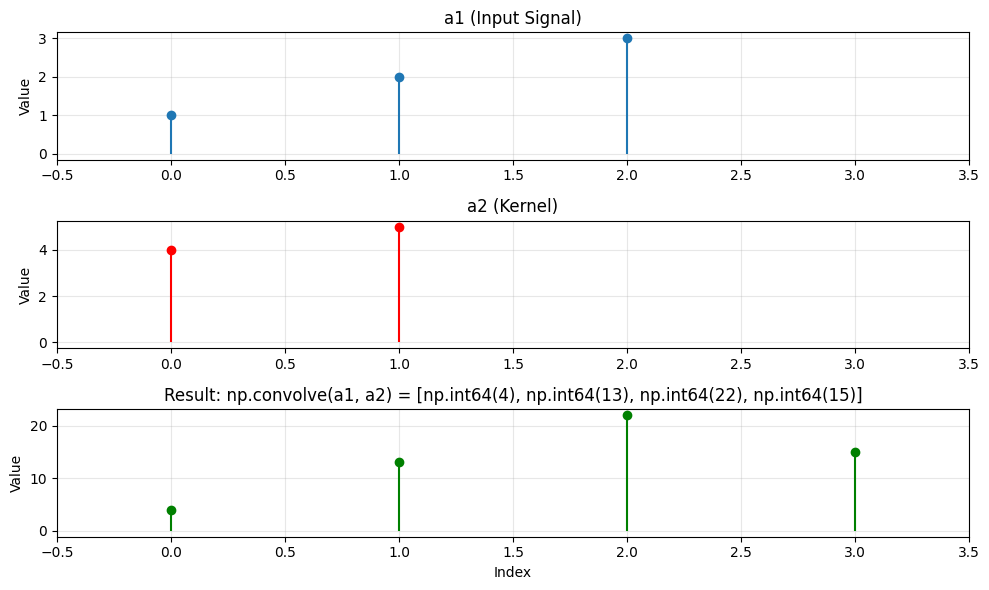

In [27]:
fig, axes = plt.subplots(3, 1, figsize=(10, 6))

# Plot a1 (input signal)
axes[0].stem(range(len(a1)), a1, basefmt=' ')
axes[0].set_title('a1 (Input Signal)')
axes[0].set_ylabel('Value')
axes[0].set_xlim(-0.5, len(result) - 0.5)
axes[0].grid(True, alpha=0.3)

# Plot a2 (kernel)
axes[1].stem(range(len(a2)), a2, basefmt=' ', linefmt='r-', markerfmt='ro')
axes[1].set_title('a2 (Kernel)')
axes[1].set_ylabel('Value')
axes[1].set_xlim(-0.5, len(result) - 0.5)
axes[1].grid(True, alpha=0.3)

# Plot result (convolution output)
axes[2].stem(range(len(result)), result, basefmt=' ', linefmt='g-', markerfmt='go')
axes[2].set_title(f'Result: np.convolve(a1, a2) = {list(result)}')
axes[2].set_xlabel('Index')
axes[2].set_ylabel('Value')
axes[2].set_xlim(-0.5, len(result) - 0.5)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
def convolve(a, b):
    b = b[::-1]
    result = []
    a_size, b_size = len(a), len(b)
    for i in range(a_size + b_size - 1):
        if i < len(a):
            b_window = b[b_size - 1 -i:]
            a_window = a[:i+1]
        else:
            b_window = b[: b_size - i -1 ]
            a_window = a[i - a_size + 1: ]
        result.append(sum([a*b for (a,b) in zip(a_window, b_window)]))

        print(f'i: {i} a window: {a_window} b window: {b_window}')
    return result


def convolve2(data: list[int], window: list[int]):
    window = window[::-1]
    data_size, window_size = len(data), len(window)

    result = []
    
    for i in range(data_size + window_size - 1):  # the total number of iterations needed
        data_start =  max(i - window_size + 1, 0)
        data_end = min (i+1, data_size)

        window_start = max(window_size - i - 1, 0)
        #  i + 1 - data_size - check how for window moved outside the data
        #  window_size - (i + 1 - data_size) - size of intersection  between window and data
        window_end = window_size - (i + 1 - data_size)  if i >= data_size else window_size

        data_view = data[data_start: data_end]
        window_view = window[window_start: window_end]

        result.append(sum([a*b for (a,b) in zip(data_view, window_view)]))
        # print(f'data start:end: {data_start}:{data_end}, window start:end: {window_start}:{window_end}')
        print(f'data view: {data_view} window view: {window_view}')
    return result


            
        # # grab first from a and last from be
        # iter_result = a[i] * b[j]
        # result.append(iter_result)
        # print(i)

assert convolve2(a1, a1) == list(np.convolve(a1, a1))
assert convolve2(a1, a2) == list(np.convolve(a1, a2))

data view: [1] window view: [1]
data view: [1, 2] window view: [2, 1]
data view: [1, 2, 3] window view: [3, 2, 1]
data view: [2, 3] window view: [3, 2]
data view: [3] window view: [3]
data view: [1] window view: [4]
data view: [1, 2] window view: [5, 4]
data view: [2, 3] window view: [5, 4]
data view: [3] window view: [5]


In [ ]:
# in: a1 = [1, 2, 3]
#     a2 = [4, 5]
# expected: array([ 5, 14, 23, 12])

[]

In [67]:
convolve(a1, a1), np.convolve(a1, a1)

i: 0 a window: [1] b window: [1]
i: 1 a window: [1, 2] b window: [2, 1]
i: 2 a window: [1, 2, 3] b window: [3, 2, 1]
i: 3 a window: [2, 3] b window: [3, 2]
i: 4 a window: [3] b window: [3]


([1, 4, 10, 12, 9], array([ 1,  4, 10, 12,  9]))

In [80]:
convolve2([1,2,3], [-1, 0, 1]), np.convolve([1,2,3], [1, 0, -1])

data view: [1] window view: [-1]
data view: [1, 2] window view: [0, -1]
data view: [1, 2, 3] window view: [1, 0, -1]
data view: [2, 3] window view: [1, 0]
data view: [3] window view: [1]


([-1, -2, -2, 2, 3], array([ 1,  2,  2, -2, -3]))

In [ ]:
# now let's work on 2d convolutionf